In [1]:
# Import necessary functions:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [2]:
# Import acceleration data from WALKING.csv:
# Please replace the file path if necessary! 
dataframe = pd.read_csv(r"C:\Users\power\Downloads\WALKING.csv", usecols=[0,1,2,3])
dataframe

,timestamp,accel_x,accel_y,accel_z
0,8053921773725,-0.883179,1.508240,9.011398
1,8053926809125,-0.859634,1.496918,9.453842
2,8053931844525,-0.838913,1.510834,9.847977
3,8053936879926,-0.772034,1.532089,10.237396
4,8053941915326,-0.683975,1.533402,10.469177
...,...,...,...,...
4403,8076092618803,-0.668900,1.024261,10.868851
4404,8076097654203,-0.771667,0.975876,10.488922
4405,8076102689603,-0.599350,0.979950,10.136169
4406,8076107725004,-0.295120,0.931442,9.666077


Text(0.5, 1.0, 'Unsmoothed Acceleration Data')

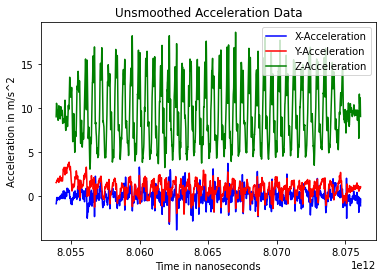

In [3]:
# Plot the unsmoothed data:
plt.plot(dataframe['timestamp'], dataframe['accel_x'], color='blue', label='X-Acceleration')
plt.plot(dataframe['timestamp'], dataframe['accel_y'], color='red', label='Y-Acceleration')
plt.plot(dataframe['timestamp'], dataframe['accel_z'], color='green', label='Z-Acceleration')
plt.legend()
plt.xlabel('Time in nanoseconds')
plt.ylabel('Acceleration in m/s^2')
plt.title('Unsmoothed Acceleration Data')

In [4]:
# Begin by smoothing data:
#   Here we use a simple moving average.
#   This is something that the data analysis components of python allows us to do.
#   This is run on the data collected from all 3 axes.

# Here we can choose a window, this will change how smooth the data will look.
window = 31
accel_x_smooth = pd.DataFrame(dataframe['accel_x'].rolling(window).mean())
accel_y_smooth = pd.DataFrame(dataframe['accel_y'].rolling(window).mean())
accel_z_smooth = pd.DataFrame(dataframe['accel_z'].rolling(window).mean())

dataframe = pd.concat([dataframe, accel_x_smooth, accel_y_smooth, accel_z_smooth], axis = 1)
dataframe.columns = ['timestamp','accel_x', 'accel_y', 'accel_z', 'accel_x_smooth', 'accel_y_smooth', 'accel_z_smooth']
dataframe

,timestamp,accel_x,accel_y,accel_z,accel_x_smooth,accel_y_smooth,accel_z_smooth
0,8053921773725,-0.883179,1.508240,9.011398,NaN,NaN,NaN
1,8053926809125,-0.859634,1.496918,9.453842,NaN,NaN,NaN
2,8053931844525,-0.838913,1.510834,9.847977,NaN,NaN,NaN
3,8053936879926,-0.772034,1.532089,10.237396,NaN,NaN,NaN
4,8053941915326,-0.683975,1.533402,10.469177,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4403,8076092618803,-0.668900,1.024261,10.868851,-0.677907,0.877746,9.844177
4404,8076097654203,-0.771667,0.975876,10.488922,-0.688753,0.873838,9.876646
4405,8076102689603,-0.599350,0.979950,10.136169,-0.687313,0.877517,9.908482
4406,8076107725004,-0.295120,0.931442,9.666077,-0.673466,0.875725,9.929300


Text(0, 0.5, 'Acceleration in m/s^2')

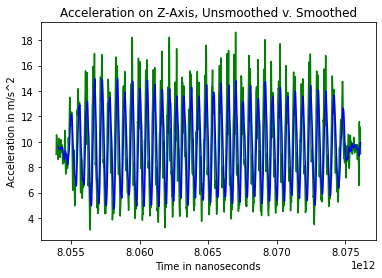

In [5]:
# This plot shows the effect from smoothing the dataset. We will preform this on all 3 axes of acceleration.
plt.plot(dataframe['timestamp'], dataframe['accel_z'], color='green', label='Z-Acceleration')
plt.plot(dataframe['timestamp'], dataframe['accel_z_smooth'], color='blue', label='Z-Acceleration')
plt.title('Acceleration on Z-Axis, Unsmoothed v. Smoothed')
plt.xlabel('Time in nanoseconds')
plt.ylabel('Acceleration in m/s^2')

In [6]:
# At each timestamp convert XYZ acceleration vectors into scalar values.
# This will give us the overall magnitude, for each timestamp. The result
# will mean that any large changes in acceleration will be steps taken.

# Get vector magnitude, during each timestamp:
magnitude = pd.DataFrame(np.sqrt(((dataframe['accel_x_smooth'] ** 2) + (dataframe['accel_y_smooth'] ** 2) + (dataframe['accel_z_smooth'] ** 2))))
dataframe = pd.concat([dataframe, magnitude], axis = 1)
dataframe.columns = ['timestamp','accel_x', 'accel_y', 'accel_z', 'accel_x_smooth', 'accel_y_smooth', 'accel_z_smooth', 'magnitude']
dataframe

,timestamp,accel_x,accel_y,accel_z,accel_x_smooth,accel_y_smooth,accel_z_smooth,magnitude
0,8053921773725,-0.883179,1.508240,9.011398,NaN,NaN,NaN,NaN
1,8053926809125,-0.859634,1.496918,9.453842,NaN,NaN,NaN,NaN
2,8053931844525,-0.838913,1.510834,9.847977,NaN,NaN,NaN,NaN
3,8053936879926,-0.772034,1.532089,10.237396,NaN,NaN,NaN,NaN
4,8053941915326,-0.683975,1.533402,10.469177,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4403,8076092618803,-0.668900,1.024261,10.868851,-0.677907,0.877746,9.844177,9.906454
4404,8076097654203,-0.771667,0.975876,10.488922,-0.688753,0.873838,9.876646,9.939120
4405,8076102689603,-0.599350,0.979950,10.136169,-0.687313,0.877517,9.908482,9.970981
4406,8076107725004,-0.295120,0.931442,9.666077,-0.673466,0.875725,9.929300,9.990568


In [7]:
# We then isolate the constant effects on the acceleration. In this instance, that
# would be gravity, which should be about 9.81 m/s^2. We then add this to the 
# dataframe and continue.
g = np.mean(dataframe['magnitude'])
# g = 9.66025366732964

magnitude_no_g = pd.DataFrame(dataframe['magnitude'] - g)
dataframe = pd.concat([dataframe, magnitude_no_g], axis = 1)
dataframe.columns = ['timestamp','accel_x', 'accel_y', 'accel_z', 'accel_x_smooth', 'accel_y_smooth', 'accel_z_smooth', 'magnitude', 'magnitude_no_g']
dataframe

,timestamp,accel_x,accel_y,accel_z,accel_x_smooth,accel_y_smooth,accel_z_smooth,magnitude,magnitude_no_g
0,8053921773725,-0.883179,1.508240,9.011398,NaN,NaN,NaN,NaN,NaN
1,8053926809125,-0.859634,1.496918,9.453842,NaN,NaN,NaN,NaN,NaN
2,8053931844525,-0.838913,1.510834,9.847977,NaN,NaN,NaN,NaN,NaN
3,8053936879926,-0.772034,1.532089,10.237396,NaN,NaN,NaN,NaN,NaN
4,8053941915326,-0.683975,1.533402,10.469177,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4403,8076092618803,-0.668900,1.024261,10.868851,-0.677907,0.877746,9.844177,9.906454,0.246200
4404,8076097654203,-0.771667,0.975876,10.488922,-0.688753,0.873838,9.876646,9.939120,0.278866
4405,8076102689603,-0.599350,0.979950,10.136169,-0.687313,0.877517,9.908482,9.970981,0.310727
4406,8076107725004,-0.295120,0.931442,9.666077,-0.673466,0.875725,9.929300,9.990568,0.330314


Text(0, 0.5, 'Acceleration in m/s^2')

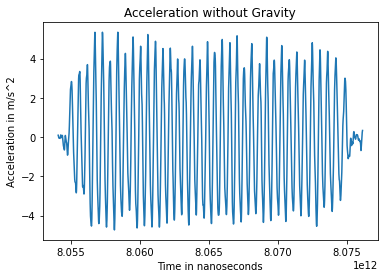

In [8]:
# This plots the overall acceleration, without the effects of gravity.
plt.plot(dataframe['timestamp'], dataframe['magnitude_no_g'])
plt.title('Acceleration without Gravity')
plt.xlabel('Time in nanoseconds')
plt.ylabel('Acceleration in m/s^2')

In [9]:
# Find peaks in the data, each peak represents a step:
# Here the threshold is considered to one standard deviation of the dataset.
# So any peak that is greater than one standard deviation is considered to be a step.
# This will print out the index of each peak in the dataset and thier heights.
threshold = np.std(dataframe['magnitude_no_g'])
num_steps = find_peaks(dataframe['magnitude_no_g'], height = threshold)
num_steps

(array([ 221,  340,  450,  559,  667,  780,  888,  996, 1107, 1216, 1321,
        1430, 1537, 1643, 1656, 1748, 1848, 1961, 2070, 2178, 2279, 2388,
        2500, 2602, 2706, 2814, 2926, 3029, 3138, 3245, 3353, 3462, 3574,
        3684, 3796, 3906, 4023, 4155], dtype=int64),
 {'peak_heights': array([2.83224506, 3.34316932, 3.69525951, 5.34352067, 5.34492214,
         3.87179289, 5.34620019, 4.26837545, 5.10560047, 4.63296618,
         5.22877285, 4.88536786, 4.51428092, 4.53523468, 3.39731375,
         3.98241262, 3.98761662, 4.63095956, 3.94025341, 4.8641513 ,
         4.316067  , 4.97769492, 4.81180386, 5.16547965, 3.53479969,
         4.76580302, 3.74229644, 5.09161899, 3.92208264, 4.66510148,
         3.94722674, 4.33903442, 3.9222028 , 4.80998245, 4.44960322,
         4.37295565, 4.03883396, 3.0029603 ])})

In [10]:
# The number of steps is equal to the number of peaks in the smoothed dataset.
# These peaks must be greater than one standard deviation from the mean.
len(num_steps[0])

38

In [11]:
# Import acceleration data from TURNING.csv:
dataframe = pd.read_csv(r"C:\Users\power\Downloads\WALKING.csv", usecols=[0,4,5,6,7,8,9])
dataframe

,timestamp,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,8053921773725,-0.402206,0.077042,-0.192047,NaN,NaN,NaN
1,8053926809125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,8053931844525,-0.391907,-0.110809,-0.127625,0.000000,0.000000,0.000000
3,8053936879926,-0.349976,-0.206604,-0.099014,0.000000,0.000000,0.000000
4,8053941915326,-0.285629,-0.302750,-0.073761,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
4403,8076092618803,-0.003342,0.089264,-0.067215,17.338562,-18.896484,-47.998047
4404,8076097654203,0.029312,0.091171,-0.065018,17.338562,-18.896484,-47.998047
4405,8076102689603,0.051102,0.099884,-0.061279,17.338562,-18.896484,-47.998047
4406,8076107725004,0.056076,0.111725,-0.053421,17.512512,-18.435669,-47.749330


Text(0.5, 1.0, 'Unsmoothed Magnetometer Data')

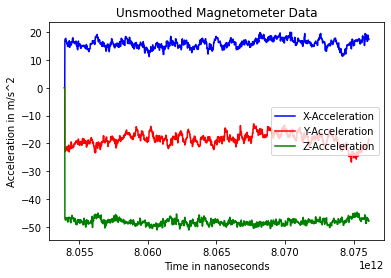

In [12]:
# Plot the unsmoothed data:
plt.plot(dataframe['timestamp'], dataframe['mag_x'], color='blue', label='X-Acceleration')
plt.plot(dataframe['timestamp'], dataframe['mag_y'], color='red', label='Y-Acceleration')
plt.plot(dataframe['timestamp'], dataframe['mag_z'], color='green', label='Z-Acceleration')
plt.legend()
plt.xlabel('Time in nanoseconds')
plt.ylabel('Acceleration in m/s^2')
plt.title('Unsmoothed Magnetometer Data')

In [13]:
# Begin by smoothing data, using the same technique as before:
window = 31
accel_x_smooth = pd.DataFrame(dataframe['mag_x'].rolling(window).mean())
accel_y_smooth = pd.DataFrame(dataframe['mag_y'].rolling(window).mean())
accel_z_smooth = pd.DataFrame(dataframe['mag_z'].rolling(window).mean())

dataframe = pd.concat([dataframe, accel_x_smooth, accel_y_smooth, accel_z_smooth], axis = 1)
dataframe.columns = ['timestamp', 'gyro_x', 'gyro_y', 'gyro_z','mag_x', 'mag_y', 'mag_z', 'mag_x_smooth', 'mag_y_smooth', 'mag_z_smooth']
dataframe

,timestamp,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,mag_x_smooth,mag_y_smooth,mag_z_smooth
0,8053921773725,-0.402206,0.077042,-0.192047,NaN,NaN,NaN,NaN,NaN,NaN
1,8053926809125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2,8053931844525,-0.391907,-0.110809,-0.127625,0.000000,0.000000,0.000000,NaN,NaN,NaN
3,8053936879926,-0.349976,-0.206604,-0.099014,0.000000,0.000000,0.000000,NaN,NaN,NaN
4,8053941915326,-0.285629,-0.302750,-0.073761,0.000000,0.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4403,8076092618803,-0.003342,0.089264,-0.067215,17.338562,-18.896484,-47.998047,17.867747,-20.335339,-47.232203
4404,8076097654203,0.029312,0.091171,-0.065018,17.338562,-18.896484,-47.998047,17.858345,-20.222916,-47.234911
4405,8076102689603,0.051102,0.099884,-0.061279,17.338562,-18.896484,-47.998047,17.805136,-20.154251,-47.280293
4406,8076107725004,0.056076,0.111725,-0.053421,17.512512,-18.435669,-47.749330,17.757539,-20.070722,-47.317653


Text(0, 0.5, 'Magnetic Field Strength')

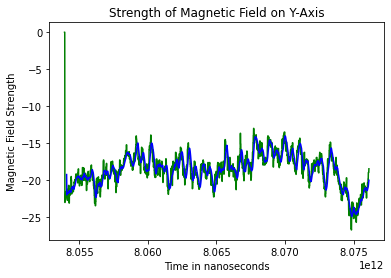

In [14]:
# This plot shows the effect from smoothing the dataset. We will preform this on all 3 axes of acceleration.
plt.plot(dataframe['timestamp'], dataframe['mag_y'], color='green', label='Z-Acceleration')
plt.plot(dataframe['timestamp'], dataframe['mag_y_smooth'], color='blue', label='Z-Acceleration')
plt.title('Strength of Magnetic Field on Y-Axis')
plt.xlabel('Time in nanoseconds')
plt.ylabel('Magnetic Field Strength')

In [15]:
angle = pd.DataFrame(np.arctan2(dataframe['mag_y_smooth'], dataframe['mag_x_smooth']))
angle

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4403,-0.849900
4404,-0.847411
4405,-0.847204
4406,-0.846472


In [16]:
# Import acceleration data from WALKING_AND_TURNING.csv:
dataframe = pd.read_csv(r"C:\Users\power\Downloads\WALKING_AND_TURNING.csv", usecols=[0,1,2,3])
dataframe

,timestamp,accel_x,accel_y,accel_z
0,4.705270e+12,-1.039291,1.879379,8.739746
1,4.705270e+12,-1.189652,1.968170,8.929367
2,4.705280e+12,-1.261230,1.930435,9.410690
3,4.705280e+12,-1.322586,1.823990,9.995331
4,4.705290e+12,-1.410751,1.714020,10.620209
...,...,...,...,...
9621,4.753710e+12,0.554215,1.330795,12.114456
9622,4.753720e+12,0.758530,1.464889,11.083038
9623,4.753720e+12,0.754791,1.473083,10.216034
9624,4.753730e+12,0.436325,1.390976,9.220627


Text(0.5, 1.0, 'Unsmoothed Acceleration Data')

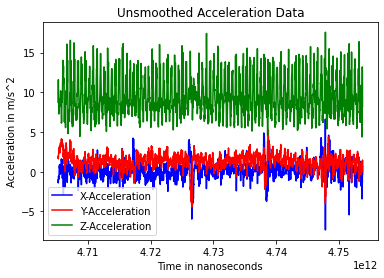

In [17]:
# Plot the unsmoothed data:
plt.plot(dataframe['timestamp'], dataframe['accel_x'], color='blue', label='X-Acceleration')
plt.plot(dataframe['timestamp'], dataframe['accel_y'], color='red', label='Y-Acceleration')
plt.plot(dataframe['timestamp'], dataframe['accel_z'], color='green', label='Z-Acceleration')
plt.legend()
plt.xlabel('Time in nanoseconds')
plt.ylabel('Acceleration in m/s^2')
plt.title('Unsmoothed Acceleration Data')

In [18]:
# Begin by smoothing data:
#   Here we use a simple moving average.
#   This is something that the data analysis components of python allows us to do.
#   This is run on the data collected from all 3 axes.

# Here we can choose a window, this will change how smooth the data will look.
window = 31
accel_x_smooth = pd.DataFrame(dataframe['accel_x'].rolling(window).mean())
accel_y_smooth = pd.DataFrame(dataframe['accel_y'].rolling(window).mean())
accel_z_smooth = pd.DataFrame(dataframe['accel_z'].rolling(window).mean())

dataframe = pd.concat([dataframe, accel_x_smooth, accel_y_smooth, accel_z_smooth], axis = 1)
dataframe.columns = ['timestamp','accel_x', 'accel_y', 'accel_z', 'accel_x_smooth', 'accel_y_smooth', 'accel_z_smooth']
dataframe

,timestamp,accel_x,accel_y,accel_z,accel_x_smooth,accel_y_smooth,accel_z_smooth
0,4.705270e+12,-1.039291,1.879379,8.739746,NaN,NaN,NaN
1,4.705270e+12,-1.189652,1.968170,8.929367,NaN,NaN,NaN
2,4.705280e+12,-1.261230,1.930435,9.410690,NaN,NaN,NaN
3,4.705280e+12,-1.322586,1.823990,9.995331,NaN,NaN,NaN
4,4.705290e+12,-1.410751,1.714020,10.620209,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9621,4.753710e+12,0.554215,1.330795,12.114456,-0.563191,0.795931,9.531346
9622,4.753720e+12,0.758530,1.464889,11.083038,-0.554473,0.804750,9.612225
9623,4.753720e+12,0.754791,1.473083,10.216034,-0.544301,0.812070,9.664854
9624,4.753730e+12,0.436325,1.390976,9.220627,-0.539342,0.818442,9.679790


Text(0, 0.5, 'Acceleration in m/s^2')

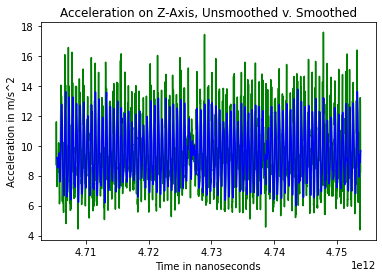

In [19]:
# This plot shows the effect from smoothing the dataset. We will preform this on all 3 axes of acceleration.
plt.plot(dataframe['timestamp'], dataframe['accel_z'], color='green', label='Z-Acceleration')
plt.plot(dataframe['timestamp'], dataframe['accel_z_smooth'], color='blue', label='Z-Acceleration')
plt.title('Acceleration on Z-Axis, Unsmoothed v. Smoothed')
plt.xlabel('Time in nanoseconds')
plt.ylabel('Acceleration in m/s^2')

In [20]:
# At each timestamp convert XYZ acceleration vectors into scalar values.
# This will give us the overall magnitude, for each timestamp. The result
# will mean that any large changes in acceleration will be steps taken.

# Get vector magnitude, during each timestamp:
magnitude = pd.DataFrame(np.sqrt(((dataframe['accel_x_smooth'] ** 2) + (dataframe['accel_y_smooth'] ** 2) + (dataframe['accel_z_smooth'] ** 2))))
dataframe = pd.concat([dataframe, magnitude], axis = 1)
dataframe.columns = ['timestamp','accel_x', 'accel_y', 'accel_z', 'accel_x_smooth', 'accel_y_smooth', 'accel_z_smooth', 'magnitude']
dataframe

,timestamp,accel_x,accel_y,accel_z,accel_x_smooth,accel_y_smooth,accel_z_smooth,magnitude
0,4.705270e+12,-1.039291,1.879379,8.739746,NaN,NaN,NaN,NaN
1,4.705270e+12,-1.189652,1.968170,8.929367,NaN,NaN,NaN,NaN
2,4.705280e+12,-1.261230,1.930435,9.410690,NaN,NaN,NaN,NaN
3,4.705280e+12,-1.322586,1.823990,9.995331,NaN,NaN,NaN,NaN
4,4.705290e+12,-1.410751,1.714020,10.620209,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9621,4.753710e+12,0.554215,1.330795,12.114456,-0.563191,0.795931,9.531346,9.581089
9622,4.753720e+12,0.758530,1.464889,11.083038,-0.554473,0.804750,9.612225,9.661777
9623,4.753720e+12,0.754791,1.473083,10.216034,-0.544301,0.812070,9.664854,9.714171
9624,4.753730e+12,0.436325,1.390976,9.220627,-0.539342,0.818442,9.679790,9.729290


In [21]:
# We then isolate the constant effects on the acceleration. In this instance, that
# would be gravity, which should be about 9.81 m/s^2. We then add this to the 
# dataframe and continue.
g = np.mean(dataframe['magnitude'])
# g = 9.66025366732964

magnitude_no_g = pd.DataFrame(dataframe['magnitude'] - g)
dataframe = pd.concat([dataframe, magnitude_no_g], axis = 1)
dataframe.columns = ['timestamp','accel_x', 'accel_y', 'accel_z', 'accel_x_smooth', 'accel_y_smooth', 'accel_z_smooth', 'magnitude', 'magnitude_no_g']
dataframe

,timestamp,accel_x,accel_y,accel_z,accel_x_smooth,accel_y_smooth,accel_z_smooth,magnitude,magnitude_no_g
0,4.705270e+12,-1.039291,1.879379,8.739746,NaN,NaN,NaN,NaN,NaN
1,4.705270e+12,-1.189652,1.968170,8.929367,NaN,NaN,NaN,NaN,NaN
2,4.705280e+12,-1.261230,1.930435,9.410690,NaN,NaN,NaN,NaN,NaN
3,4.705280e+12,-1.322586,1.823990,9.995331,NaN,NaN,NaN,NaN,NaN
4,4.705290e+12,-1.410751,1.714020,10.620209,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9621,4.753710e+12,0.554215,1.330795,12.114456,-0.563191,0.795931,9.531346,9.581089,-0.120434
9622,4.753720e+12,0.758530,1.464889,11.083038,-0.554473,0.804750,9.612225,9.661777,-0.039746
9623,4.753720e+12,0.754791,1.473083,10.216034,-0.544301,0.812070,9.664854,9.714171,0.012649
9624,4.753730e+12,0.436325,1.390976,9.220627,-0.539342,0.818442,9.679790,9.729290,0.027767


Text(0, 0.5, 'Acceleration in m/s^2')

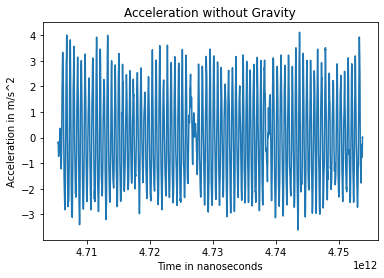

In [22]:
# This plots the overall acceleration, without the effects of gravity.
plt.plot(dataframe['timestamp'], dataframe['magnitude_no_g'])
plt.title('Acceleration without Gravity')
plt.xlabel('Time in nanoseconds')
plt.ylabel('Acceleration in m/s^2')

In [23]:
# Find peaks in the data, each peak represents a step:
# Here the threshold is considered to one standard deviation of the dataset.
# So any peak that is greater than one standard deviation is considered to be a step.
# This will print out the index of each peak in the dataset and thier heights.
threshold = np.std(dataframe['magnitude_no_g'])
num_steps = find_peaks(dataframe['magnitude_no_g'], height = threshold)
num_steps

(array([ 174,  301,  413,  527,  644,  760,  880, 1002, 1121, 1134, 1242,
        1357, 1472, 1591, 1714, 1829, 1947, 2061, 2078, 2182, 2291, 2398,
        2528, 2642, 2878, 3000, 3120, 3233, 3355, 3474, 3594, 3709, 3830,
        3945, 4062, 4186, 4204, 4456, 4573, 4696, 4710, 4820, 4934, 5055,
        5170, 5291, 5402, 5523, 5636, 5754, 5862, 5974, 6068, 6084, 6199,
        6306, 6425, 6521, 6536, 6806, 6813, 6935, 7055, 7179, 7292, 7412,
        7525, 7638, 7756, 7872, 7987, 8103, 8208, 8332, 8347, 8454, 8458,
        8575, 8695, 8702, 8824, 8941, 9059, 9170, 9285, 9397, 9523],
       dtype=int64),
 {'peak_heights': array([3.33007444, 4.00704324, 3.81785082, 3.56689216, 3.14438587,
         3.01113328, 3.26611531, 2.33014339, 3.10811165, 2.59891439,
         3.92644703, 3.46059479, 2.26754195, 3.99639257, 2.99895386,
         2.83970242, 3.28388694, 2.86152758, 2.16802729, 2.45681803,
         2.61250906, 2.27840504, 2.53856696, 2.72297203, 2.37660532,
         3.43058978, 3.03014079

In [24]:
# The number of steps is equal to the number of peaks in the smoothed dataset.
# These peaks must be greater than one standard deviation from the mean.
len(num_steps[0])

87